In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/train'
validation_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/validation'
nb_train_samples = 1000
nb_validation_samples = 300
epochs = 50
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        seed=123)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

reduce_lr_acc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='max')
mcp_save = ModelCheckpoint('/home/mksnkv/models/simple/conv_two_class_passport.h5', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks = [reduce_lr_acc, mcp_save],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/50
50/50 [==============================] - 36s 717ms/step - loss: 0.7281 - accuracy: 0.4740 - val_loss: 0.6894 - val_accuracy: 0.5700
Epoch 2/50
50/50 [==============================] - 31s 616ms/step - loss: 0.6646 - accuracy: 0.5770 - val_loss: 0.6218 - val_accuracy: 0.6433
Epoch 3/50
50/50 [==============================] - 31s 616ms/step - loss: 0.5861 - accuracy: 0.6930 - val_loss: 0.5460 - val_accuracy: 0.7500
Epoch 4/50
50/50 [==============================] - 30s 606ms/step - loss: 0.5491 - accuracy: 0.7440 - val_loss: 0.6110 - val_accuracy: 0.6633
Epoch 5/50
50/50 [==============================] - 31s 618ms/step - loss: 0.5086 - accuracy: 0.7620 - val_loss: 0.5376 - val_accuracy: 0.8100
Epoch 6/50
50/50 [==============================] - 31s 619ms/step - loss: 0.4372 - accuracy: 0.8120 - val_loss: 0.4705 - val_accuracy: 0.7733
Epoch 7/50
50/50 [==============================] - 31s 611

In [6]:
# model.save('/home/mksnkv/models/simple/conv_two_class_passport.h5')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


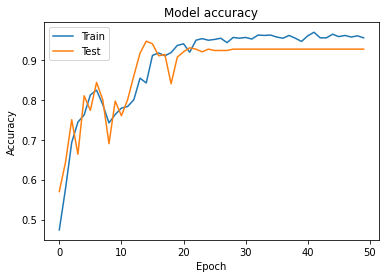

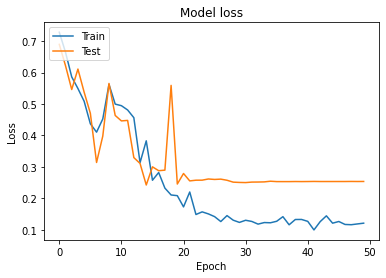

In [11]:
plot_model(model, to_file='model.png')
    # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

    # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
evaluation_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/evaluation'
eval_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = eval_datagen.flow_from_directory(
        directory = evaluation_data_dir,
        target_size=(img_width, img_height),
        color_mode="rgb",
        batch_size=10,
        class_mode=None,
        shuffle=False)
best_model = load_model('/home/mksnkv/models/simple/conv_two_class_passport.h5')
best_model.evaluate_generator(generator=eval_generator, steps = 780 // 10)
    

Found 780 images belonging to 2 classes.


IndexError: list index out of range